# Import modules and load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
warnings.filterwarnings('ignore')

In [ ]:
# Pastikan Google Drive sudah terhubung
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Tugas1_ML/1/car_price_prediction.csv')

In [ ]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# Exploring the data

In [ ]:
df.shape

(19237, 18)

In [ ]:
df.describe()


,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

## Notes:
- Id is not useful
- Engine volume and Mileage are object instead of numerical data type
- Cylinders can be integer

In [ ]:
df.duplicated().sum()

313

In [ ]:
df.isna().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [ ]:
# get the most 5 frequent items in each column in a new dataframe
most_frequent_items = df.apply(lambda x: x.value_counts().head(5).index.tolist())
most_frequent_items_df = pd.DataFrame(most_frequent_items)
most_frequent_items_df


,0
ID,"[45815365, 45815361, 45815363, 45815368, 45723..."
Price,"[15681, 470, 14113, 392, 314]"
Levy,"[-, 765, 891, 639, 640]"
Manufacturer,"[HYUNDAI, TOYOTA, MERCEDES-BENZ, FORD, CHEVROLET]"
Model,"[Prius, Sonata, Camry, Elantra, E 350]"
Prod. year,"[2012, 2014, 2013, 2011, 2015]"
Category,"[Sedan, Jeep, Hatchback, Minivan, Coupe]"
Leather interior,"[Yes, No]"
Fuel type,"[Petrol, Diesel, Hybrid, LPG, CNG]"
Engine volume,"[2, 2.5, 1.8, 1.6, 1.5]"


# Exploratory Data Analysis & Data cleaning


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop('ID', axis=1, inplace=True)

In [ ]:
df['Levy'].value_counts().head() / len(df)*100

,count
Levy,
-,30.168041
765,2.547030
891,2.393786
639,2.129571
640,2.103149


30% of this column is `-`

In [ ]:
df['Levy'] = df['Levy'].replace('-', 0)
df['Levy'] = df['Levy'].astype(float)

In [ ]:
df['Engine volume'] = df['Engine volume'].str.split(' ').str[0].astype(float)

In [ ]:
df['Mileage']= df['Mileage'].str.split(' ').str[0].astype(float)

In [ ]:
df['Cylinders'] = df['Cylinders'].astype(int)

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

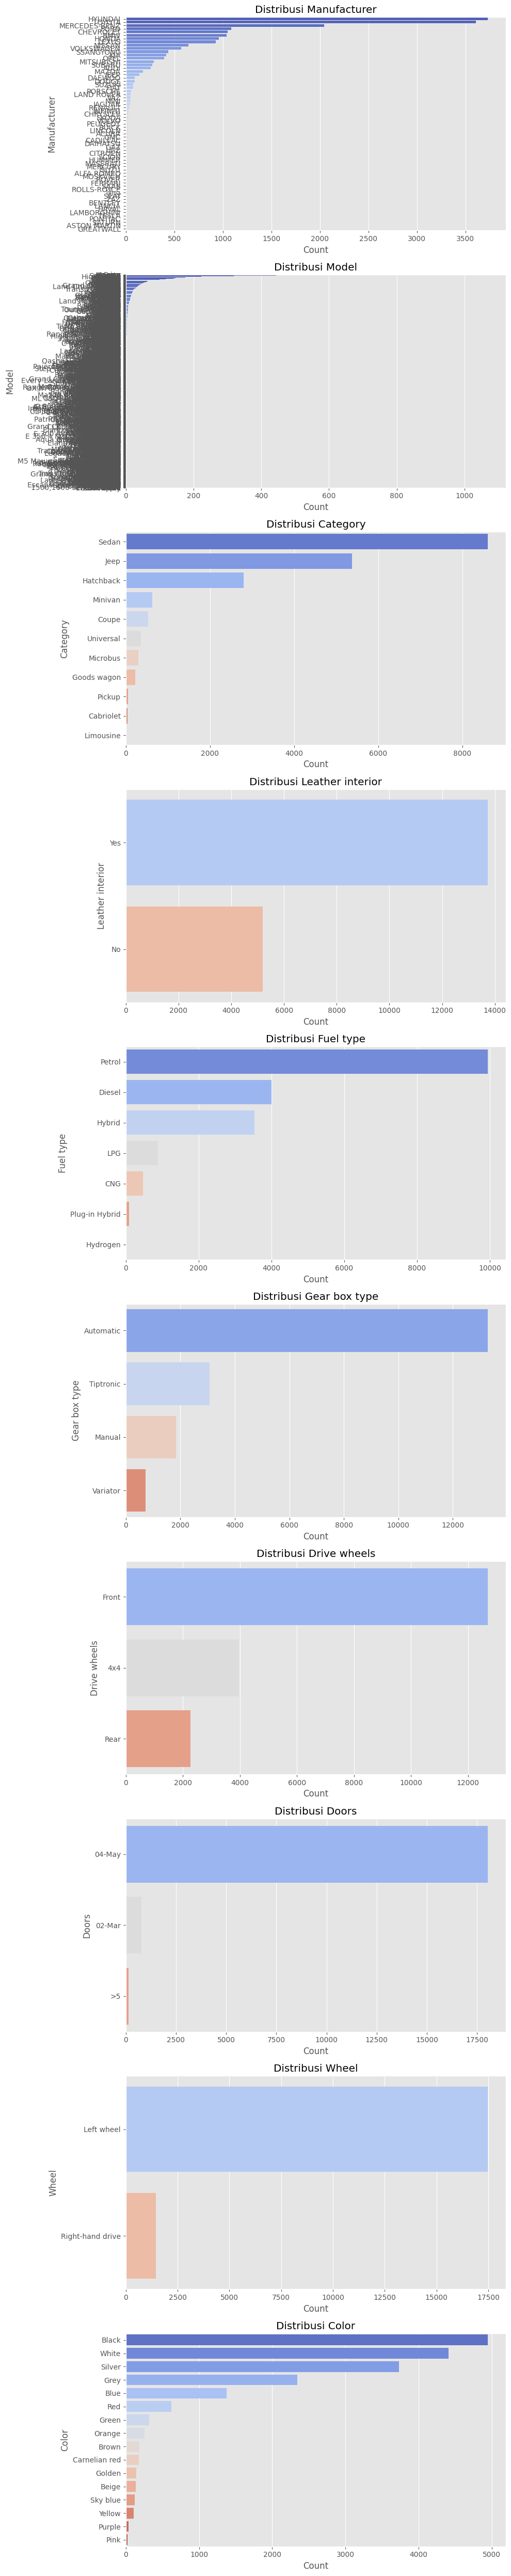

In [ ]:
# Menentukan ukuran figure untuk semua plot
plt.style.use('ggplot')
# Plot untuk kolom kategorikal
def plot_categorical_columns(df, categorical_columns):
    fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, len(categorical_columns) * 5))
    for i, col in enumerate(categorical_columns):
        sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i], palette='coolwarm')
        axes[i].set_title(f'Distribusi {col}')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(col)
    plt.tight_layout()
    plt.show()

plot_categorical_columns(df, categorical_columns)

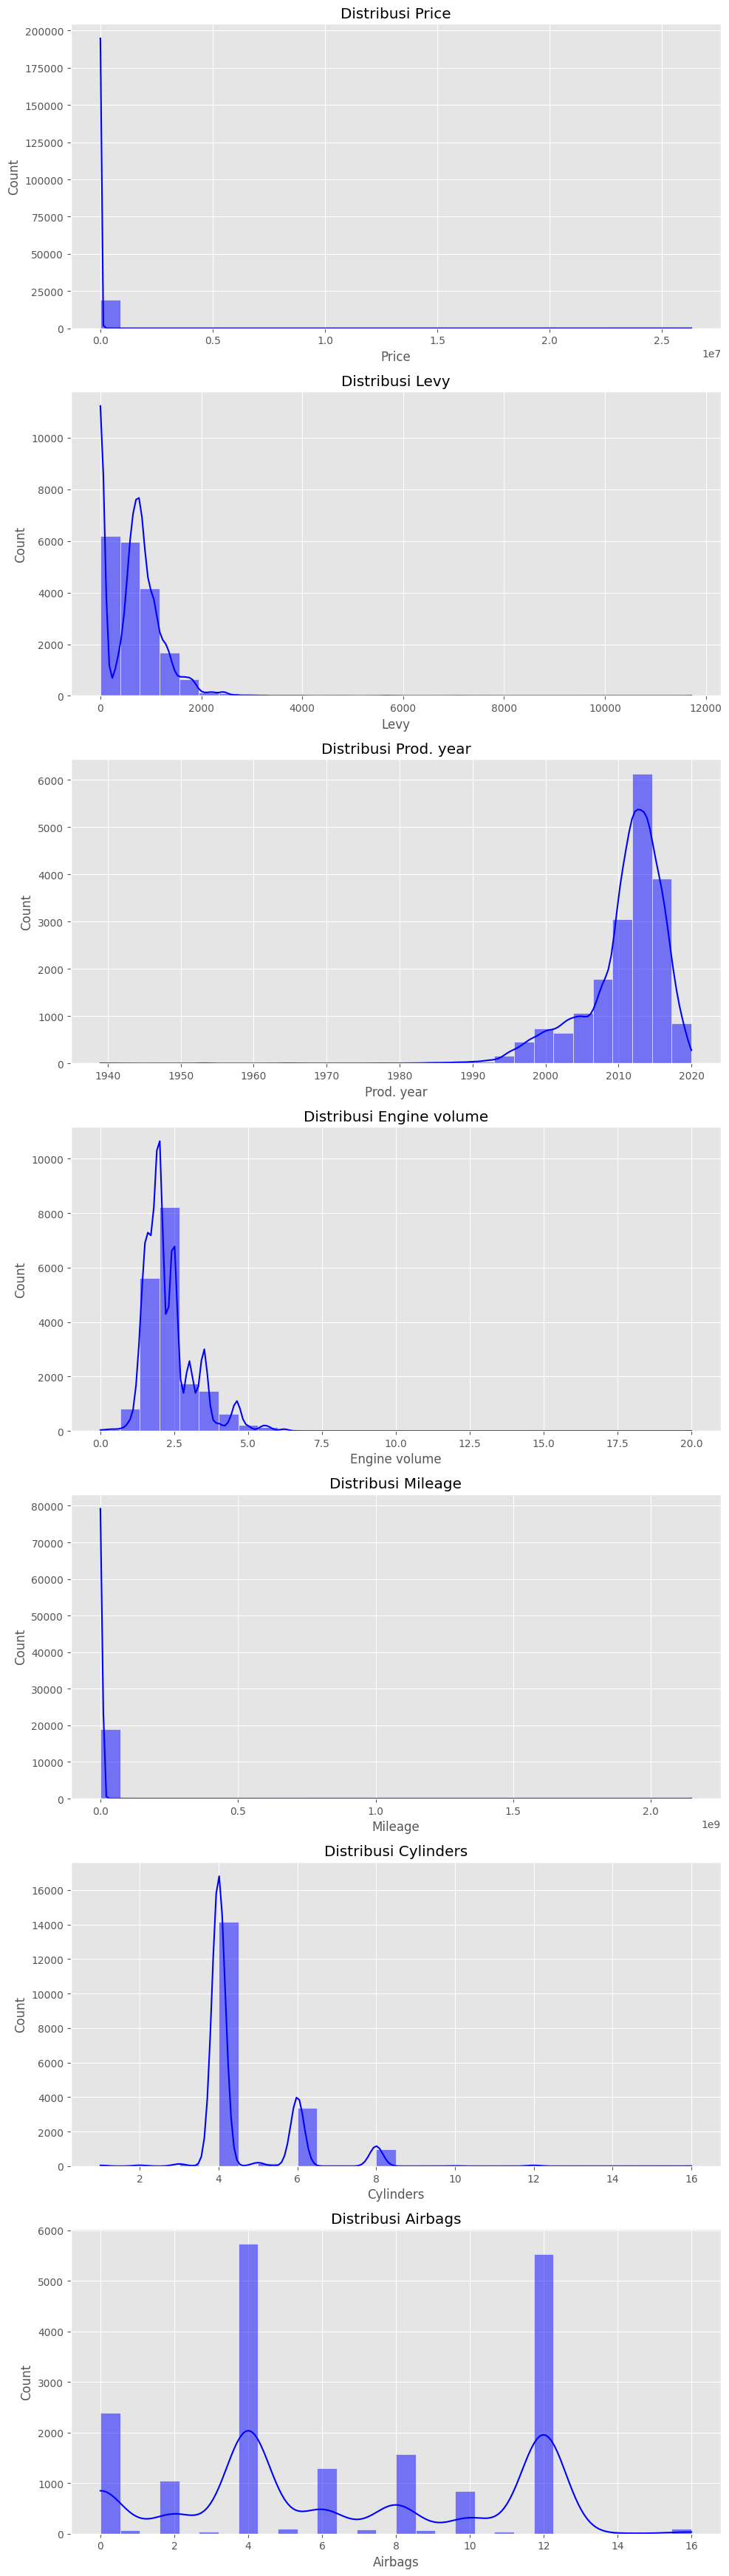

In [ ]:
# Plot untuk kolom numerik
def plot_numerical_columns(df, numerical_columns):
    fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, len(numerical_columns) * 5))
    for i, col in enumerate(numerical_columns):
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='blue')
        axes[i].set_title(f'Distribusi {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
    plt.tight_layout()
    plt.show()

# Menjalankan fungsi
plot_numerical_columns(df, numerical_columns)

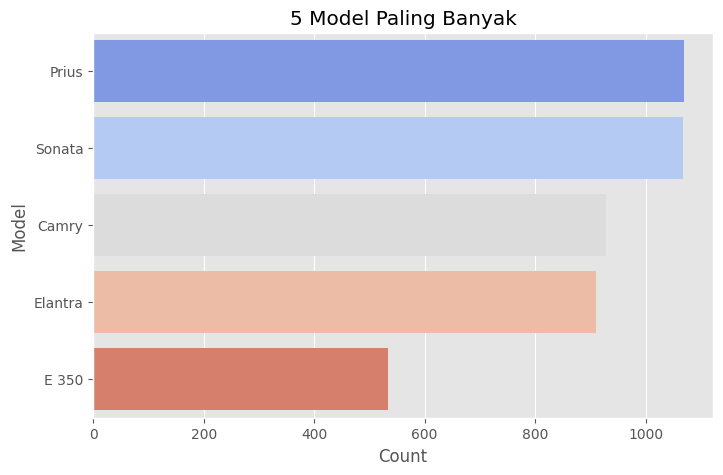

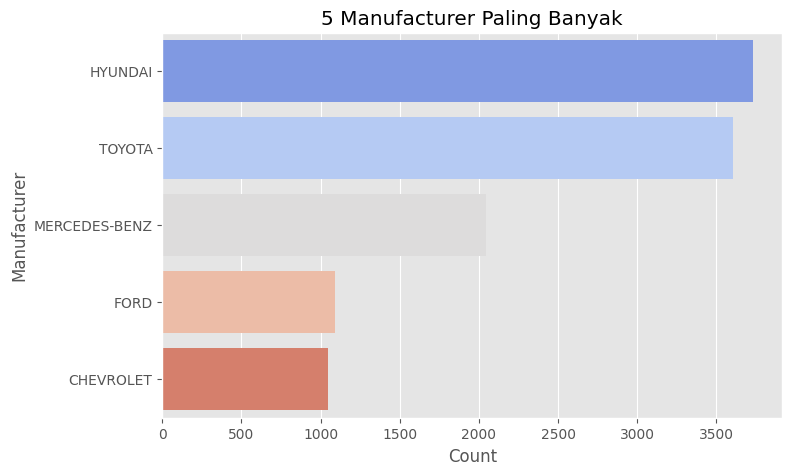

In [ ]:
# Fungsi untuk menampilkan 5 kategori teratas pada kolom tertentu
def plot_top_5_categorical(df, column):
    top_5 = df[column].value_counts().head(5)  # Ambil 5 kategori terbanyak
    plt.figure(figsize=(8, 5))
    sns.barplot(y=top_5.index, x=top_5.values, palette='coolwarm')
    plt.title(f'5 {column} Paling Banyak')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

# Menampilkan 5 kategori terbanyak pada 'Model' dan 'Manufacture'
plot_top_5_categorical(df, 'Model')
plot_top_5_categorical(df, 'Manufacturer')


# Data Prep

### Clipping (deleting hard outliers)

In [ ]:
# Menentukan batas bawah dan atas berdasarkan persentil
lowerBound = df[numerical_columns].quantile(0.05)  # Persentil 5%
upperBound = df[numerical_columns].quantile(0.95)  # Persentil 95%

# Menerapkan clipping pada setiap kolom numerik
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.clip(lower=lowerBound[x.name], upper=upperBound[x.name]))


### Feature extraction
bertujuan untuk menghitung usia kendaraan berdasarkan tahun produksi dan menggantikan Prod. year dengan Age (usia kendaraan).

In [ ]:
now_year = dt.datetime.now().year
df['Age'] = now_year - df['Prod. year']
df.drop('Prod. year', axis=1, inplace=True)

### Encode values

In [ ]:
encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])
df.sample(5)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
7632,49410.3,1017.0,23,1334,2017,9,1,5,2.0,30930.0,4,0,1,1,0,14,4
3950,49410.3,1327.0,58,435,2017,9,1,5,2.5,6800.0,6,0,1,1,0,1,8
3250,314.0,0.0,5,1533,2008,4,1,5,3.0,240000.0,6,2,0,1,0,1,8
9427,15053.0,0.0,5,1533,2000,4,1,5,4.0,250000.0,8,2,0,1,0,1,4
16189,16900.0,503.0,58,262,2012,3,1,5,1.5,46756.0,4,0,1,1,0,1,4


In [ ]:
corr = df.corr()
corr

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
Price,1.000000,0.050207,-0.080797,0.085718,0.332866,-0.090344,0.127175,-0.058071,0.085167,-0.231870,0.039900,0.124229,-0.015181,0.026032,-0.150805,-0.013750,-0.056192
Levy,0.050207,1.000000,-0.069494,0.035594,0.467765,0.019489,0.377258,-0.015372,0.332786,-0.027417,0.196218,-0.344395,-0.183645,0.100199,-0.203566,-0.015584,0.143150
Manufacturer,-0.080797,-0.069494,1.000000,-0.017196,-0.055048,-0.038951,-0.175233,-0.087002,-0.043093,0.033041,-0.091595,0.055739,-0.066787,0.047499,0.086100,0.031369,0.182026
Model,0.085718,0.035594,-0.017196,1.000000,0.053480,-0.165242,-0.002072,-0.168451,0.028227,0.100762,-0.005934,-0.056149,-0.185820,0.071607,-0.033839,0.072150,-0.106670
Prod. year,0.332866,0.467765,-0.055048,0.053480,1.000000,0.078028,0.402679,0.063069,-0.047426,-0.257149,-0.128444,-0.236572,-0.114052,0.170253,-0.266386,0.012176,0.224663
Category,-0.090344,0.019489,-0.038951,-0.165242,0.078028,1.000000,0.092195,0.112179,0.012363,0.009418,-0.071324,-0.009413,0.212334,0.221986,-0.119409,-0.019457,0.135442
Leather interior,0.127175,0.377258,-0.175233,-0.002072,0.402679,0.092195,1.000000,-0.033814,0.287229,0.009621,0.194851,-0.288333,-0.087991,0.094042,-0.346620,-0.056343,0.163661
Fuel type,-0.058071,-0.015372,-0.087002,-0.168451,0.063069,0.112179,-0.033814,1.000000,-0.005010,-0.141192,0.083131,0.103579,-0.041325,-0.044347,0.081820,-0.077465,0.076640
Engine volume,0.085167,0.332786,-0.043093,0.028227,-0.047426,0.012363,0.287229,-0.005010,1.000000,0.165566,0.808030,-0.008441,-0.242700,-0.015867,-0.193489,-0.133926,0.248213
Mileage,-0.231870,-0.027417,0.033041,0.100762,-0.257149,0.009418,0.009621,-0.141192,0.165566,1.000000,0.139875,-0.014431,-0.057299,0.005299,-0.018782,0.001726,-0.027620


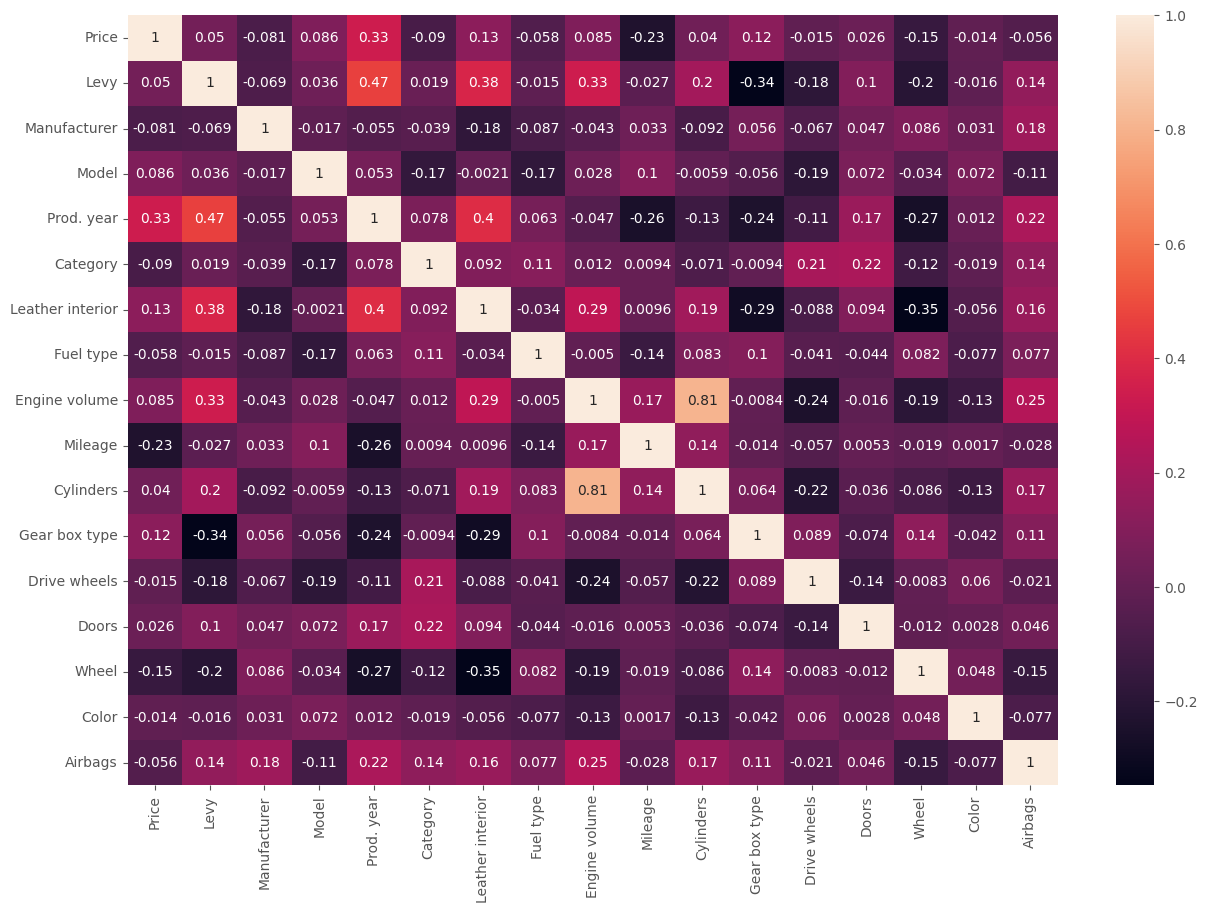

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.show()

Berdasarkan heatmap korelasi di atas, kolom **'Color', 'Doors', 'Drive wheels', 'Fuel type', dan 'Airbags'** memiliki korelasi yang sangat rendah terhadap harga mobil (**Price**). Korelasi yang rendah menunjukkan bahwa variabel-variabel ini tidak memiliki pengaruh yang signifikan terhadap target yang ingin kita prediksi.  

Oleh karena itu, untuk menyederhanakan model dan menghindari fitur yang tidak memberikan banyak informasi, kita menghapus kolom-kolom tersebut dari dataset. Hal ini juga membantu mengurangi kompleksitas model dan meningkatkan efisiensi pelatihan tanpa kehilangan informasi yang relevan. 🚀

In [ ]:
# Daftar kolom yang akan dihapus
columns_to_drop = ['Color', 'Doors', 'Drive wheels', 'Fuel type', 'Airbags']

# Menghapus kolom dari DataFrame
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Menampilkan DataFrame setelah penghapusan
df.head()


,Price,Levy,Manufacturer,Model,Category,Leather interior,Engine volume,Mileage,Cylinders,Gear box type,Wheel,Age
0,13328.0,1399.0,32,1242,4,1,3.5,186005.0,6,0,0,15
1,16621.0,1018.0,8,658,4,0,3.0,192000.0,6,2,0,14
2,8467.0,0.0,21,684,3,0,1.4,200000.0,4,3,1,19
3,3607.0,862.0,16,661,4,1,2.5,168966.0,4,0,0,14
4,11726.0,446.0,21,684,3,1,1.4,91901.0,4,0,0,11
